# Basic usage

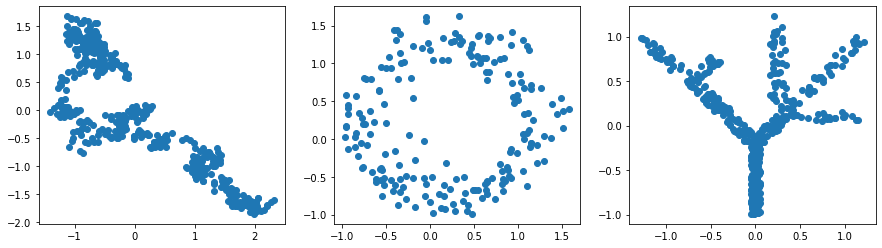

In [1]:
import elpigraph
import numpy as np
import matplotlib.pyplot as plt

# load toy data
X_curve = np.loadtxt('../data/curve_data.csv',delimiter=',')[:,:2]
X_circle = np.loadtxt('../data/circle_data.csv',delimiter=',')[:,:2]
X_tree = np.loadtxt('../data/tree_data.csv',delimiter=',')[:,:2]

f,axs=plt.subplots(1,3,figsize=(15,4))
axs[0].scatter(*X_curve.T)
axs[1].scatter(*X_circle.T)
axs[2].scatter(*X_tree.T)
plt.show()

## Fitting principal graphs
We can fit a principal graph with appropriate topology for each dataset, with specified number of graph nodes

In [2]:
pg_curve = elpigraph.computeElasticPrincipalCurve(X_curve,NumNodes=50)[0]
pg_circle = elpigraph.computeElasticPrincipalCircle(X_circle,NumNodes=50)[0]
pg_tree = elpigraph.computeElasticPrincipalTree(X_tree,NumNodes=50)[0]

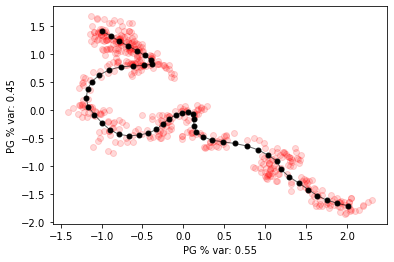

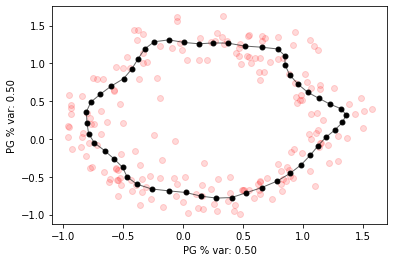

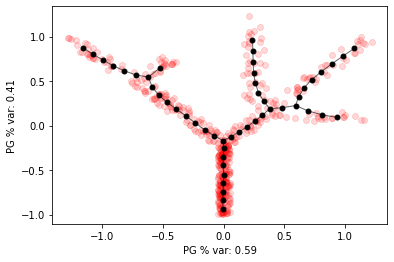

In [3]:
# plot graph (NodePositions and Edges) and data
elpigraph.plot.PlotPG(X_curve,pg_curve,Do_PCA=False)
elpigraph.plot.PlotPG(X_circle,pg_circle,Do_PCA=False)
elpigraph.plot.PlotPG(X_tree,pg_tree,Do_PCA=False)

Main parameters to tune are:
*  NumNodes : the number of nodes of the graph 

*  Lambda : the attractive strength of edges between nodes (constrains edge lengths)

*  Mu : the repulsive strength of a node's neighboring nodes (constrains angles to be close to harmonic)

*  alpha : branching penalty (penalizes number of branches for the principal tree)

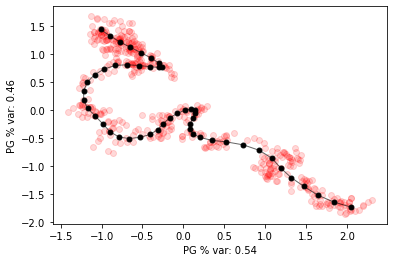

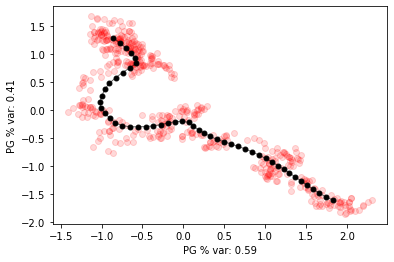

In [4]:
# illustrate tuning Lambda

pg_curve = elpigraph.computeElasticPrincipalCurve(X_curve,NumNodes=50,Lambda=0.001)[0]
elpigraph.plot.PlotPG(X_curve,pg_curve,Do_PCA=False)

pg_curve = elpigraph.computeElasticPrincipalCurve(X_curve,NumNodes=50,Lambda=0.1)[0]
elpigraph.plot.PlotPG(X_curve,pg_curve,Do_PCA=False)

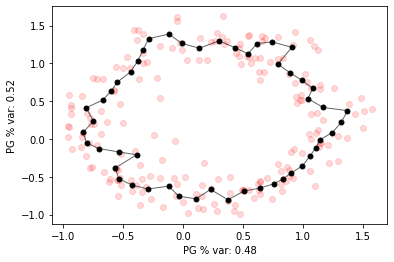

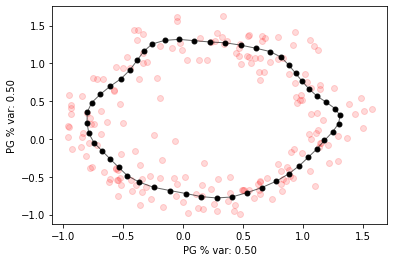

In [5]:
# illustrate tuning Mu

pg_curve = elpigraph.computeElasticPrincipalCircle(X_circle,NumNodes=50,Mu=0.001)[0]
elpigraph.plot.PlotPG(X_circle,pg_curve,Do_PCA=False)
pg_curve = elpigraph.computeElasticPrincipalCircle(X_circle,NumNodes=50,Mu=0.2)[0]
elpigraph.plot.PlotPG(X_circle,pg_curve,Do_PCA=False)

## Projecting and ordering cells along the graph


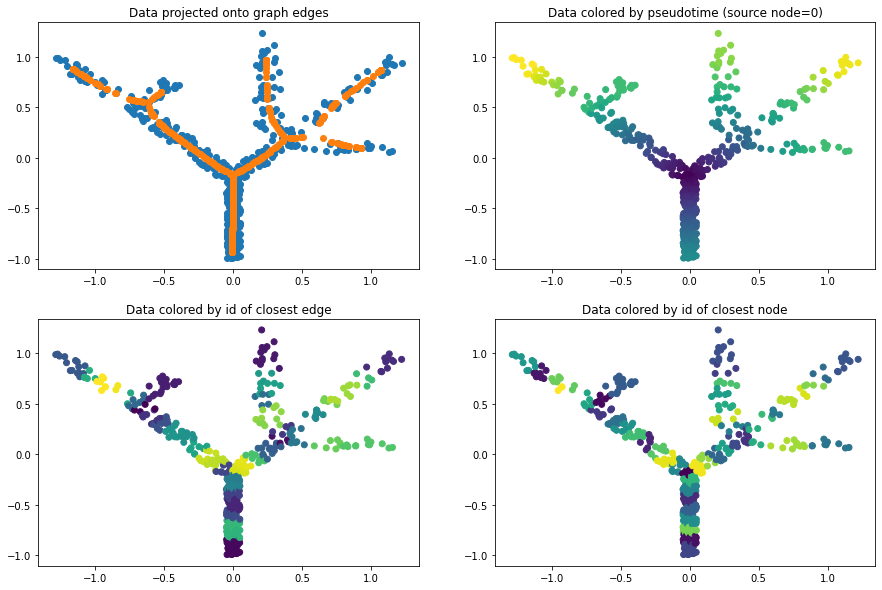

In [5]:
# results are directly stored in pg_tree as a dictionary
source_node = 0
elpigraph.utils.getPseudotime(X_tree,pg_tree,source=source_node,target=None)

dict_proj = pg_tree['projection']
pseudotime = pg_tree['pseudotime']

f, axs = plt.subplots(2,2,figsize=(15,10))
axs = axs.flat
titles = ['Data projected onto graph edges',  f'Data colored by pseudotime (source node={source_node})',
          'Data colored by id of closest edge', 'Data colored by id of closest node']
colors = [None, pseudotime, dict_proj['edge_id'], dict_proj['node_id']]

for i in range(4):
    ax=next(axs)
    ax.scatter(*X_tree.T,c=colors[i])
    if i==0: ax.scatter(*dict_proj['X_projected'].T)
    ax.set_title(titles[i])
plt.show()

## Speeding up computations
Computations can be sped up by reducing the number of candidate graphs topologies considered at each step.

This is especially useful for high number of nodes, where number of candidates starts growing fast

CPU times: user 1min 24s, sys: 1min 13s, total: 2min 38s
Wall time: 13.7 s
CPU times: user 38.7 s, sys: 34.2 s, total: 1min 12s
Wall time: 6.39 s


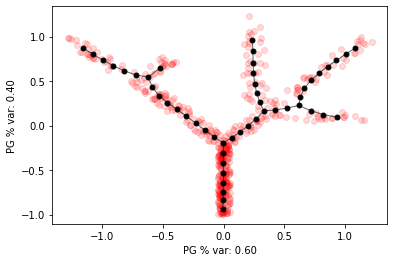

In [6]:
%time pg_tree = elpigraph.computeElasticPrincipalTree(X_tree,50)[0]
%time pg_tree = elpigraph.computeElasticPrincipalTree(X_tree,50,MaxNumberOfGraphCandidatesDict={"AddNode2Node":20,"BisectEdge":10,"ShrinkEdge":10})[0]
elpigraph.plot.PlotPG(X_tree,pg_tree,Do_PCA=False)